# LABORATORY 02


### Intro - Matplotlib

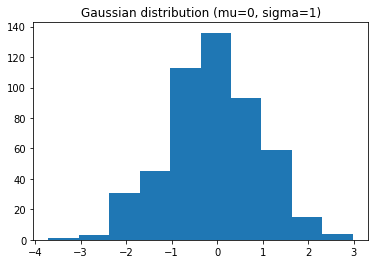

In [ ]:
#in this example gauss just to use a random distribution for graph

from random import gauss
import matplotlib.pyplot as plt
%matplotlib inline

list_values = [ gauss(0,1) for _ in range(500)]
plt.hist(list_values)
plt.title('Gaussian distribution (mu=0, sigma=1)')
plt.show()

### GLT GLOBAL LAND TEMPERATURE

Downloading the dataset as usual using commandline collab tools.

In [ ]:
!wget "https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv" -O glt_data.csv

--2022-10-20 16:01:00--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12720645 (12M) [text/plain]
Saving to: ‘glt_data.csv’

glt_data.csv        100%[===================>]  12.13M  --.-KB/s    in 0.06s   

2022-10-20 16:01:02 (218 MB/s) - ‘glt_data.csv’ saved [12720645/12720645]



In [ ]:
import csv

dataset_glt = []

with open('glt_data.csv') as db:
  dataset_glt = [ data for data in db]

# Characteristics of our dataset
# Size of our dataset
len(dataset_glt)

219576

We observe some data is not clean, and also that there are some missing values within our dataset. 

We can augment our data inserting instead of null or missing values other values which can be established using three different approaches:

1. Delete that row based if missing is represent or not (brute approach)

2.1. Fill missing values using the mean (or the median) of the involved attribute. 
 
2.2. Fill with values of adjacent rows, by averaging them (only possible if mean is computable). 

Exercise 1. Load the Global Land Temperature dataset as a list of lists. Before starting, take a moment to better inspect the attributes you are going to work on. How many of them are nominal, how many
continuous or discrete?



In [ ]:
type(dataset_glt)

list

In [ ]:
#printing only from row 0 to 4

print(dataset_glt[0:4])

['Date,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude\n', "1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W\n", "1849-02-01,27.434,1.3619999999999999,Abidjan,Côte D'Ivoire,5.63N,3.23W\n", "1849-03-01,,,Abidjan,Côte D'Ivoire,5.63N,3.23W\n"]


As we can see the first row contains our feature names, respectively:

- Date: ordinal since distinctness and order
- AverageTemperature: continuous
- AverageTemperatureUncertainty: continous 
- City: nominal
- Country: nominal
- Latitude: nominal
- Longitude: nominal

The file contains an header so we need to remove it, and we define a new way to open and store the dataset.

In [ ]:
import csv

col_names = []
dataset = [[], [], [], [], [], [], []] #storing the dataset in a list of lists
with open('glt_data.csv') as fp:
    reader = csv.reader(fp)
    col_names = next(reader)
    for cols in reader:
        if len(cols) == len(col_names): # every column must be present
            for i in range(len(dataset)):
                dataset[i].append(cols[i])

print(dataset[0][0])
print(dataset[0][1])
print(dataset[1][0])

1849-01-01
1849-02-01
26.704


Exercise 2.  Analyze the attribute AverageTemperature, which contains missing values. 

In [ ]:
#analyzing a few lines

In [ ]:
for i in range(5): #4 lines to be printed for semplicity
  for j in range(len(dataset)):
    print(f"{dataset[j][i]} ", end="")
  print('')

1849-01-01 26.704 1.435 Abidjan Côte D'Ivoire 5.63N 3.23W 
1849-02-01 27.434 1.3619999999999999 Abidjan Côte D'Ivoire 5.63N 3.23W 
1849-03-01   Abidjan Côte D'Ivoire 5.63N 3.23W 
1849-04-01 26.14 1.3869999999999998 Abidjan Côte D'Ivoire 5.63N 3.23W 
1849-05-01 25.427 1.2 Abidjan Côte D'Ivoire 5.63N 3.23W 


The total number of rows is:

In [ ]:
#counting number of rows of first column/feature of the list
number_rows = len(dataset[0])
number_rows

219575

Fill any gap with the arithmetic mean among the closest antecedent and the closest successive measurements in time, taken in the same city. Assume the following rules for edge cases:

In [ ]:
#counting all missing data

def count_missing(data):
  return sum( [1 for c in data if c==''])

In [ ]:
#counting missing data on the average temperature attribute

total_count = len(dataset[1])

print(f"Missing values on the attribute Average Temperature is {count_missing(dataset[1])}.\nHence missing values are out of whole dataset: {100*count_missing(dataset[1])/total_count:.1f}%")

print(f"Missing values on the attribute Average Temperature Uncertainty is {count_missing(dataset[2])}.\nHence missing values are out of whole dataset: {100*count_missing(dataset[2])/len(dataset[2]):.1f}%")

Missing values on the attribute Average Temperature is 27581.
Hence missing values are out of whole dataset: 12.6%
Missing values on the attribute Average Temperature Uncertainty is 27581.
Hence missing values are out of whole dataset: 12.6%


Consider this example, try to replicate it.

original_list = [ '', 5, 6, '' ]

step_1 = [ 2.5, 5, 6, '' ] # (0 + 5) / 2

step_2 = [ 2.5, 5, 6, 3 ] # (6 + 0) / 2

What we need to do is to point to left of the index we are looking at and its right hand part so that we can perform an average between these two values.

1. *filling_value* $=\frac{l+r}{2}$


VERSION A

In [ ]:
#we load the dataset and fill the gaps

#Assume we a list of values
def fill_data_gaps_A(data, cities):
  right_i = 0
  right_v = 0

  #enumerate to insert
  for i, value in enumerate(data):
    if i==0 or cities[i]!=cities[i-1]:
      #value in case
      #Initial position is 0, behind nothing
      #Or restart in case of different city
      left_v = 0
    else:
      left_v = data[i-1] 
      #otherwise we set initial
  #reuse the right_v value, useful where there are multiple consecutive missing values
    if i<right_i:
      data[i] = (left_v + right_v) / 2
      continue

    if value == '':
      for j in range(i+1, len(data)):
        if cities[j]!=cities[i]:
          right_v = 0
          break
        elif data[j] != '':
          right_v = float(data[j])
          break
      #edge case: the last value of the last city is empty
      if i==len(data)-1:
        right_v = 0

      right_i = j
      data[i] = (left_v+right_v) / 2
    else: 
      #parsing/casting all present values to float
      data[i] = float(data[i])



In [ ]:
l = ['', '12', '', '', '', '15', '']
c = ['Rome', 'Rome', 'Rome', 'Turin', 'Turin', 'Turin', 'Turin']

print('Original list:', l)
fill_data_gaps_A(l, c)
print('Filled list:', l)

Original list: ['', '12', '', '', '', '15', '']
Filled list: [6.0, 12.0, 6.0, 7.5, 11.25, 15.0, 7.5]


Note: this example also lets you reflect on the definition of *mutable and unmutable objects*. Notice that **modifing a list**, one of the mutables in the Python world, in the scope of a function that receives it as parameter, **applies** the **changes** to the **original list**.

Let's apply now the function to the lists of interest and verify that there are no more missing values.

In [ ]:
avg_temp = dataset[1]
avg_temp_unc = dataset[2]
cities = dataset[3]

fill_data_gaps_A(avg_temp, cities)
fill_data_gaps_A(avg_temp_unc, cities)

print('Missing values in AverageTemperature:', sum([1 for v in avg_temp if v == '']))
print('Missing values in AverageTemperatureUncertainty:', sum([1 for v in avg_temp_unc if v == '']))

Missing values in AverageTemperature: 0
Missing values in AverageTemperatureUncertainty: 0


VERSION B

Even if this solution works, it is tailored to the way the input file is organized. What if the sorting keys were inverted, i.e. data were sorted by Date and then by City name? Working with positional indices this way would have been much more complex. Version B overcomes this eventual problem.

In [ ]:
cities = set(dataset[3])
print('Number of distinct cities:', len(cities))

Number of distinct cities: 100


In [ ]:
city_avg_temp = {}
city_avg_temp_unc = {}

for city in cities:
    idxs = [i for i, c in enumerate(dataset[3]) if c == city] # extract the indices
    city_avg_temp[city] = [dataset[1][i] for i in idxs]
    city_avg_temp_unc[city] = [dataset[2][i] for i in idxs]                                 



### IMDs 

In this laboratory we are going to analyse sentiment analyses on text reviews about movies.